<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

**Наименование признаков** <br>
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра] <br>
Пример: rougher.input.feed_ag 

**Возможные значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики 

**Возможные значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

**Расчёт эффективности**
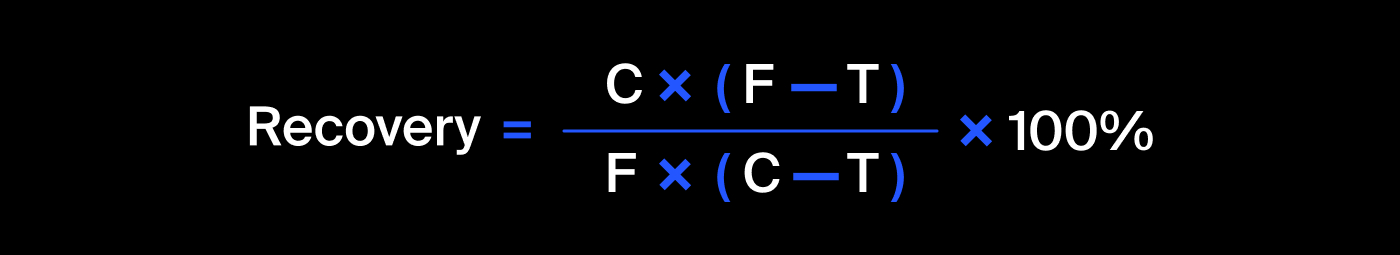
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
data_train = pd.read_csv('/datasets/gold_industry_train.csv')
data_train.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
data_train.duplicated().sum()

0

In [5]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_test.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [7]:
data_test.duplicated().sum()

0

In [8]:
data_full = pd.read_csv('/datasets/gold_industry_full.csv')
data_full.head()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [10]:
data_full.duplicated().sum()

0

<b> В данных есть пропуски. Тип данных в графе 'date' определен неверно.

Исправим тип данных.

In [11]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')
data_train['date'].dtype

dtype('<M8[ns]')

In [12]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')
data_test['date'].dtype

dtype('<M8[ns]')

In [13]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')
data_full['date'].dtype

dtype('<M8[ns]')

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.(Условия) Поэтому заполним недостающие признаки последним имеющимся в таблице признаком с такой же датой. Используем функцию 'ffil'.

In [14]:
data_train = data_train.ffill(axis=0)
data_test = data_test.ffill(axis=0)
data_full = data_full.ffill(axis=0)

In [15]:
data_train.isna().any(axis=1).sum()

0

In [16]:
data_test.isna().any(axis=1).sum()

0

In [17]:
data_full.isna().any(axis=1).sum()

0

Пропусков больше нет.

<b> Проверим, что эффективность обогащения рассчитана правильно. 

In [18]:
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100
mean_absolute_error(data_train['rougher.output.recovery'], recovery)

9.83758577644259e-15

Погрешность незначимо мала, значит эффективность рассчитана правильно.

<b> Проанализируем признаки, недоступные в тестовой выборке.

In [19]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков. (Условия)

<b> Добавим целевые признаки ('rougher.output.recovery', 'final.output.recovery') в тестовую выборку

In [20]:
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

<b>Вывод: предобработка данных проведена. Данные подготовлены для анализа: пропуски удалены, все типы данных правильно определены, нужные данные добавлены.

## Анализ данных

<b> Концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

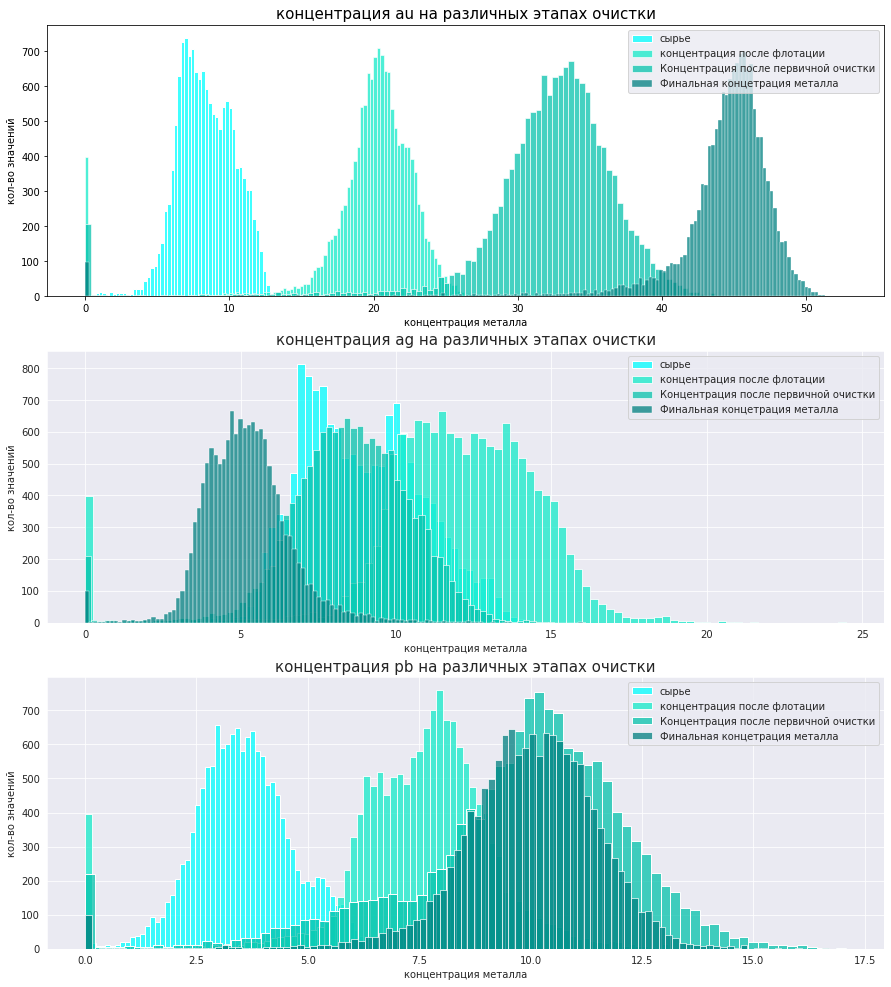

In [21]:
plt.figure(figsize=[15, 17])
x = 1
for metal in ['au', 'ag', 'pb']:
    plt.subplot(3, 1, x)
    x += 1
    plt.title(f'концентрация {metal} на различных этапах очистки', fontsize=15)
    sns.set_style('darkgrid')
    sns.histplot(data_train[f'rougher.input.feed_{metal}'], color='#00FFFF', label='сырье')
    sns.histplot(data_train[f'rougher.output.concentrate_{metal}'], color='#13EAC9', label='концентрация после флотации')
    sns.histplot(data_train[f'primary_cleaner.output.concentrate_{metal}'],
                 color='#06C2AC', label='Концентрация после первичной очистки')
    sns.histplot(data_train[f'final.output.concentrate_{metal}'], color='#008080', label='Финальная концетрация металла')
    plt.xlabel('концентрация металла')
    plt.ylabel('кол-во значений')
    plt.legend()
plt.show();

Золото: концентрация увеличивается с каждым этапом. <br>
Серебро: концентрация уменьшается с каждым этапом. <br>
Свинец: концентрация растет, но после первичной очистки почти не меняется.

Заметим нулевые значения концентрации, которые являются выбросами. Удалим их.

In [22]:
data_train.shape

(14579, 87)

In [23]:
for metal in ['au', 'ag', 'pb', 'sol']:
    data_train = data_train.loc[data_train[f'rougher.input.feed_{metal}']!=0]
    data_train = data_train.loc[data_train[f'rougher.output.concentrate_{metal}']!=0]
    data_train = data_train.loc[data_train[f'primary_cleaner.output.concentrate_{metal}']!=0]
    data_train = data_train.loc[data_train[f'final.output.concentrate_{metal}']!=0]

In [24]:
print(data_train.loc[data_train['rougher.input.feed_au']==0].shape)
print(data_train.loc[data_train['rougher.output.concentrate_au']==0].shape)
print(data_train.loc[data_train['primary_cleaner.output.concentrate_au']==0].shape)
print(data_train.loc[data_train['final.output.concentrate_au']==0].shape)

(0, 87)
(0, 87)
(0, 87)
(0, 87)


In [25]:
data_train.shape

(13978, 87)

Было удалено менее 1% данных.

<b> Распределения размеров гранул исходного сырья на обучающей и тестовой выборках.

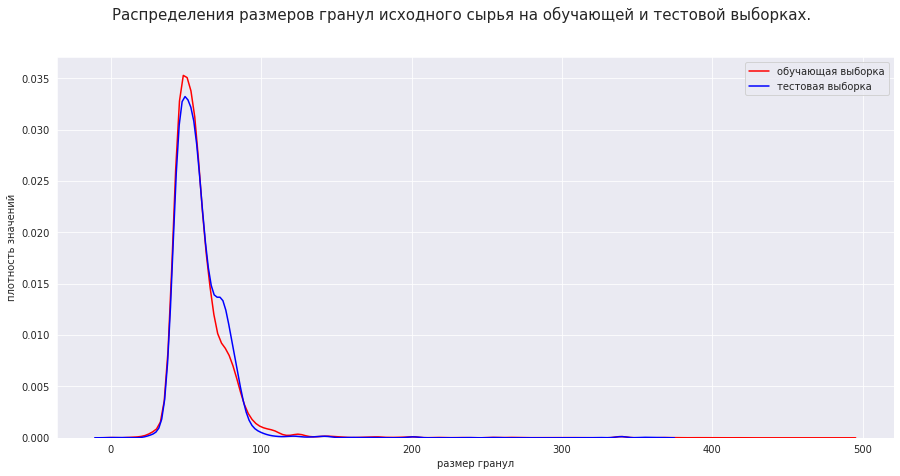

In [26]:
plt.figure(figsize=[15, 7])
plt.suptitle('Распределения размеров гранул исходного сырья на обучающей и тестовой выборках.', fontsize=15)
sns.set_style('darkgrid')
#plt.hist(data_train['rougher.input.feed_size'], color='r', label='Обучающая выборка', density=True)
sns.kdeplot(data_train['rougher.input.feed_size'], color='r', label='обучающая выборка')
sns.kdeplot(data_test['rougher.input.feed_size'], color='b', label='тестовая выборка')
plt.xlabel('размер гранул')
plt.ylabel('плотность значений')
plt.legend()
plt.show();

Размеры гранул распределены равномерно.

<b> Суммарнуая концентрация металлов на разных стадиях. В сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

Посчитаем суммарную концентрацию.

In [27]:
rougher_input = (data_train['rougher.input.feed_au'] + data_train['rougher.input.feed_ag'] +
                 data_train['rougher.input.feed_pb'] + data_train['rougher.input.feed_sol'])
rougher_output = (data_train['rougher.output.concentrate_au'] + data_train['rougher.output.concentrate_ag'] +
                  data_train['rougher.output.concentrate_pb'] + data_train['rougher.output.concentrate_sol'])
cleaner_output = (data_train['primary_cleaner.output.concentrate_au'] + data_train['primary_cleaner.output.concentrate_ag'] +
                  data_train['primary_cleaner.output.concentrate_pb'] + data_train['primary_cleaner.output.concentrate_sol'])
final_output = (data_train['final.output.concentrate_au'] + data_train['final.output.concentrate_ag'] + 
                data_train['final.output.concentrate_pb'] + data_train['final.output.concentrate_sol'])

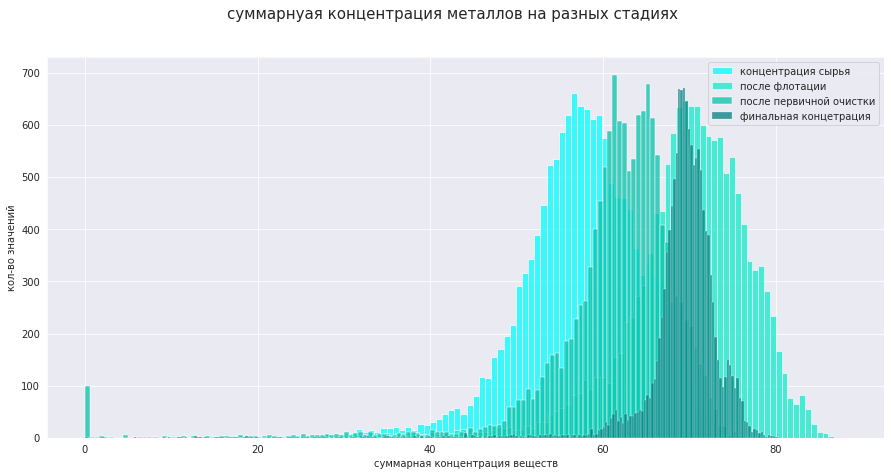

In [28]:
plt.figure(figsize=[15, 7])
plt.suptitle('суммарнуая концентрация металлов на разных стадиях', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(rougher_input, color='#00FFFF', label='концентрация сырья')
sns.histplot(rougher_output, color='#13EAC9', label='после флотации')
sns.histplot(cleaner_output, color='#06C2AC', label='после первичной очистки')
sns.histplot(final_output, color='#008080', label='финальная концетрация')
plt.xlabel('суммарная концентрация веществ')
plt.ylabel('кол-во значений')
plt.legend()
plt.show();

Суммарная концентрация металлов поэтапно увеличивается.

<b> Вывод: проанализировали концетрацию металов, выявили, что концентрация au и pb поэтапно увеличивается, а ag наоборот уменьшается. Заметили анамалии в значениях концентрации и удалили их. Сравнили распределение размеров гранул в тренировочной и тестовой выборках (оно приблизительно равно). Проанализировали суммарную концентрацию металлов на различных этапах (она постепенно увеличивается).

## Модель

<b> Напишем функцию для вычисления итогового smape.

In [29]:
def f_smape(target, predictions):
    smape = np.mean(np.abs(target-predictions)/(np.abs(target)+np.abs(predictions))*2)*100
    return smape

In [30]:
def f_final_smape(smape_rougher, smape_final):
    final_smape = 0.25*(smape_rougher) + 0.75*(smape_final)
    return final_smape

<b> Подготовим данные для обучения модели.

Оставим в тренировочном датасете только те признаки, что есть в тестовом и уберем столбец с датой.

In [31]:
data_train = data_train[data_test.columns]
data_train = data_train.drop('date', axis=1)
data_test = data_test.drop('date', axis=1)

In [32]:
features_data_train = data_train.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_data_train = data_train['rougher.output.recovery']
target_final_data_train = data_train['final.output.recovery']

Масштабируем признаки для более точной работы модели.

In [34]:
#scaler = StandardScaler()
#scaler.fit(data_full)
#data_train = scaler.transform(data_train)
#data_test = scaler.transform(data_test)

<b> Линейная регрессия

In [35]:
scorer = make_scorer(f_smape, greater_is_better = False)

In [36]:
%%time
# черновой концентрат
model = LinearRegression()
smape_rougher = cross_val_score(model, features_data_train, target_rougher_data_train, scoring=scorer, cv=5)
r = smape_rougher.mean()
# финальный концентрат
model = LinearRegression()
smape_final = cross_val_score(model, features_data_train, target_final_data_train, scoring=scorer, cv=5)
f = smape_final.mean()
final_smape = f_final_smape(r, f) * (-1)
print('Итоговое smape:', final_smape)

Итоговое smape: 8.864227576916532
CPU times: user 1.38 s, sys: 3.49 s, total: 4.86 s
Wall time: 4.8 s


<b>Дерево решений

In [37]:
state = RandomState(12345)

In [38]:
%%time
best_depth = 0
best_final_smape = 10
for depth in range(1,11):
    # черновой концентрат
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_rougher = cross_val_score(model, features_data_train, target_rougher_data_train, scoring=scorer, cv=5)
    r = smape_rougher.mean()
    # финальный концентрат
    model = DecisionTreeRegressor(max_depth=depth, random_state=state)
    smape_final = cross_val_score(model, features_data_train, target_final_data_train, scoring=scorer, cv=5)
    f = smape_final.mean()
    final_smape = f_final_smape(r, f) * (-1)
    if final_smape < best_final_smape:
        best_final_smape = final_smape
        best_depth = depth
print('Итоговое smape:', best_final_smape, ', глубина:', best_depth)

Итоговое smape: 8.650101959854426 , глубина: 3
CPU times: user 30.2 s, sys: 65.5 ms, total: 30.2 s
Wall time: 30.3 s


<b>Случайный лес

In [39]:
%%time
best_depth = 0
best_final_smape = 100
best_estimator = 0
for estimator in range(10, 91, 40):
    for depth in range(1,7):
        # черновой концентрат
        model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=state)
        smape_rougher = cross_val_score(model, features_data_train, target_rougher_data_train, scoring=scorer, cv=5)
        r = smape_rougher.mean()
        # финальный концентрат
        model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=state)
        smape_final = cross_val_score(model, features_data_train, target_final_data_train, scoring=scorer, cv=5)
        f = smape_final.mean()
        final_smape = f_final_smape(r, f) * (-1)
        if final_smape < best_final_smape:
            best_final_smape = final_smape
            best_depth = depth
            best_estimator = estimator
print('Итоговое smape:', best_final_smape, ', глубина:', best_depth, ', количество деревьев:', best_estimator)

Итоговое smape: 8.373024621271249 , глубина: 2 , количество деревьев: 90
CPU times: user 17min 56s, sys: 1.53 s, total: 17min 57s
Wall time: 17min 58s


<b> Проверка лучшей модели.

Лучше всего себя показала модель 'Случайный лес' из 90 деревьев глубины 4. Проверим ее на тестовой выборке.

In [40]:
features_data_test = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_data_test = data_test['rougher.output.recovery']
target_final_data_test = data_test['final.output.recovery']

In [41]:
# черновой концентрат
model = RandomForestRegressor(n_estimators=90, max_depth=4, random_state=state)
model.fit(features_data_train, target_rougher_data_train)
predictions = model.predict(features_data_test)
r = f_smape(target_rougher_data_test, predictions)
# финальный концентрат
model = RandomForestRegressor(n_estimators=90, max_depth=4, random_state=state)
model.fit(features_data_train, target_final_data_train)
predictions = model.predict(features_data_test)
f = f_smape(target_final_data_test, predictions)
final_smape = f_final_smape(r, f) 
print('Итоговое smape:', final_smape)

Итоговое smape: 6.751794156271688


Проверим модель на адекватность.

In [42]:
model = DummyRegressor(strategy="mean")
model.fit(features_data_train, target_rougher_data_train)
predictions = model.predict(features_data_test)
r = f_smape(target_rougher_data_test, predictions)
model = DummyRegressor(strategy="mean")
model.fit(features_data_train, target_final_data_train)
predictions = model.predict(features_data_test)
f = f_smape(target_final_data_test, predictions)
final_smape = f_final_smape(r, f)
print('Итоговое smape:', final_smape)

Итоговое smape: 8.471360971505119


sMAPE нашей модели ниже, чем у модели выдающей среднее число, значит модель работает адекватно.

<b> Вывод: лучшая модель 'Случайный лес' из 90 деревьев глубиной 4. Модель прошла все проверки.

## Общий вывод

<b> В этом проекте надо было разработать модель для эффективной работы промышленных предприятий. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.
1. Сначала была проведена подготовка данных. Были заполнены пропуски, изменен тип данных.    
2. На втором этапе были проанализированны такие параметры, как поэтапная концентрация, суммарная концентрация.
3. Затем было обучено несколько моделей и выявлена лучшая из них.
<br><br> Лучший результат показала модель случайный лес.